In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
import string

In [2]:
df =  pd.read_csv(r"C:\Users\arinc\OneDrive\Desktop\Tasks\Task 4\spam.csv",encoding='ISO-8859-1')

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
df.shape

(5572, 5)

In [6]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [7]:
df.drop(columns = ['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace = True)

In [8]:
df.rename(columns= {'v1': 'target', 'v2': 'text'}, inplace=True )

In [9]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
df.duplicated().sum()

403

In [11]:
df = df.drop_duplicates(keep='first')

In [12]:
df.duplicated().sum()

0

In [13]:
df['target'].value_counts()

ham     4516
spam     653
Name: target, dtype: int64

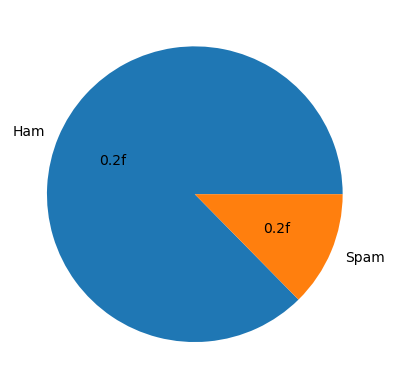

In [14]:
plt.pie(df['target'].value_counts(),labels=['Ham','Spam'],autopct="0.2f")
plt.show()

In [15]:
from sklearn.preprocessing import LabelEncoder
Encoder = LabelEncoder()
Encoder.fit(df['target'])
df['target']= Encoder.transform(df['target'])

In [16]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [17]:
df['num_char'] = df['text'].apply(len)

In [18]:
df.head()

,target,text,num_char
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [19]:
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [20]:
df.head()

,target,text,num_char,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [21]:
df[df['target']== 0][['num_char','num_words','num_sentences']].describe()

,num_char,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [22]:
df[df['target']== 1][['num_char','num_words','num_sentences']].describe()

,num_char,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


<Axes: xlabel='num_char', ylabel='Count'>

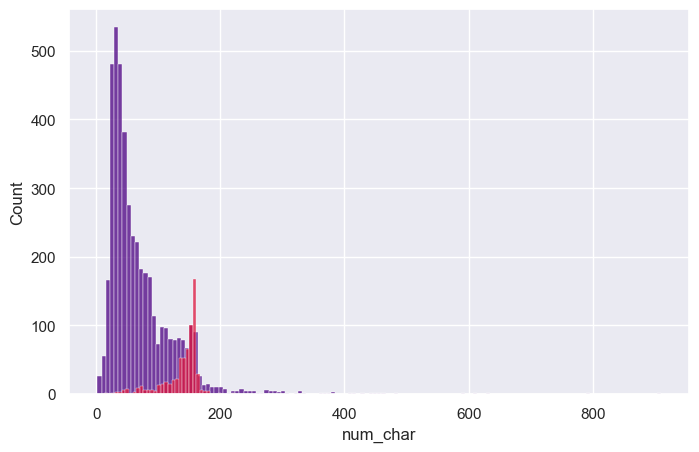

In [23]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(8,5))
sns.histplot(df[df['target']== 0]['num_char'], color = 'indigo')
sns.histplot(df[df['target']== 1]['num_char'], color= "crimson")

<Axes: xlabel='num_words', ylabel='Count'>

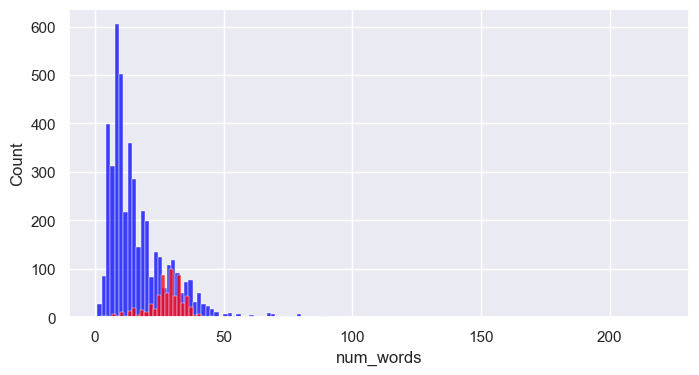

In [24]:
plt.figure(figsize=(8,4))
sns.histplot(df[df['target']== 0]['num_words'], color='blue')
sns.histplot(df[df['target']== 1]['num_words'], color= 'red')

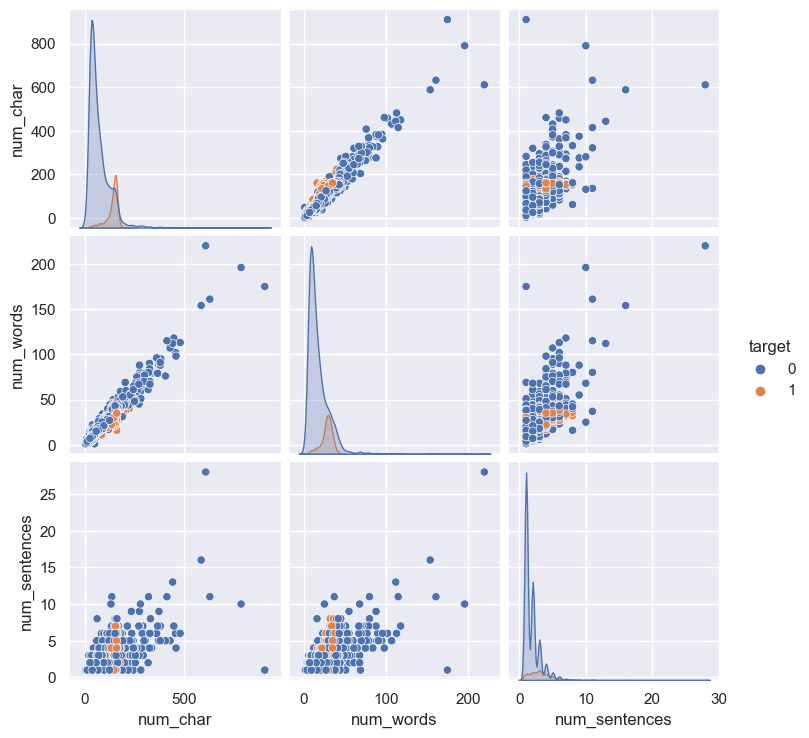

In [25]:
sns.pairplot(df, hue='target')

<Axes: >

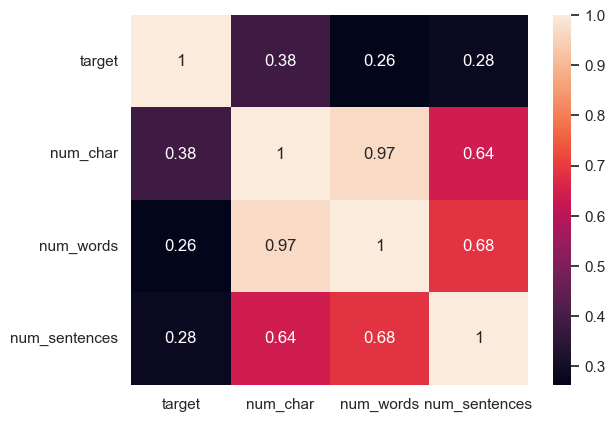

In [26]:
sns.heatmap(df.corr(), annot=True8)

In [27]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
        
        text = y[:]
        y.clear()
        
        for i in text:
            if i not in stopwords.words('english') and i not in string.punctuation:
                y.append(i)
    
        text = y[:]
        y.clear()
        
        for i in text:
            y.append(ps.stem(i))
    
    return  " ".join(y)

In [28]:
transform_text('Im gonna be home soon and i dont want to talk about this stuff anymore tonight, k? Ive cried enough today.')

'im gon na home soon dont want talk stuff anymor tonight k ive cri enough today'

In [29]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [30]:
df['transformed_text'] = df['text'].apply(transform_text)

In [31]:
df.head()

,target,text,num_char,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [32]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [33]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

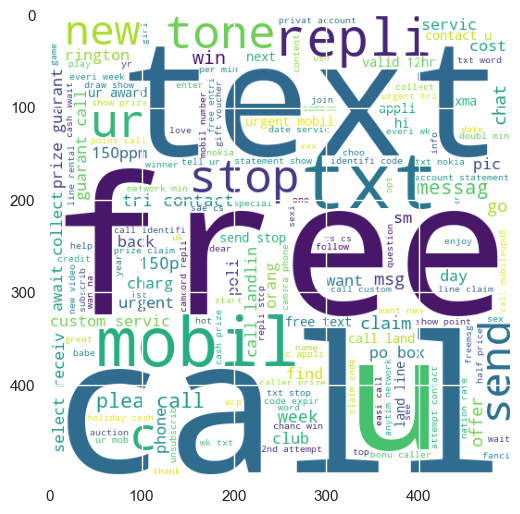

In [34]:
plt.figure(figsize = (12,6))
plt.imshow(spam_wc)

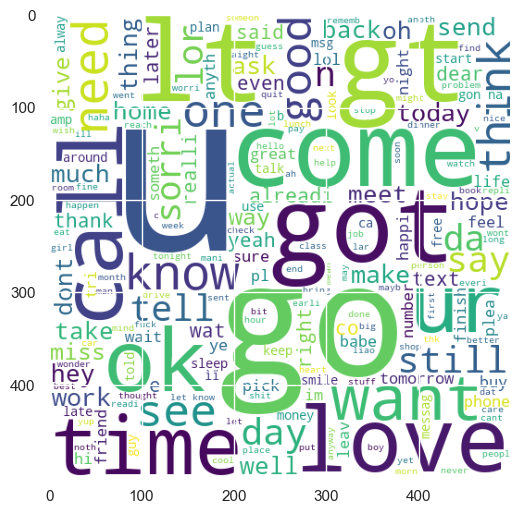

In [35]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize = (15,6))
plt.imshow(spam_wc)

In [36]:
spam_corpus = []
for msg in df[df['target']==1]['transformed_text'].tolist():
    for words in msg.split():
        spam_corpus.append(words)

In [37]:
len(spam_corpus)

9930

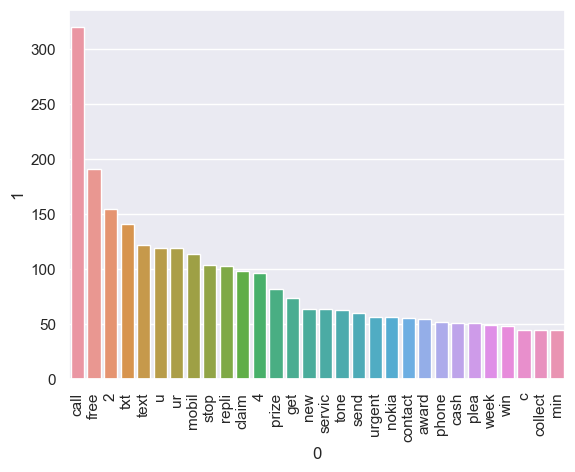

In [38]:
from collections import Counter
a1 = pd.DataFrame(Counter(spam_corpus).most_common(30))[0]
a2 = pd.DataFrame(Counter(spam_corpus).most_common(30))[1]
sns.barplot(x =a1,y=a2)
plt.xticks(rotation='vertical')
plt.show()

In [39]:
ham_corpus = []
for msg in df[df['target']==1]['transformed_text'].tolist():
    for words in msg.split():
        ham_corpus.append(words)

In [40]:
len(spam_corpus)

9930

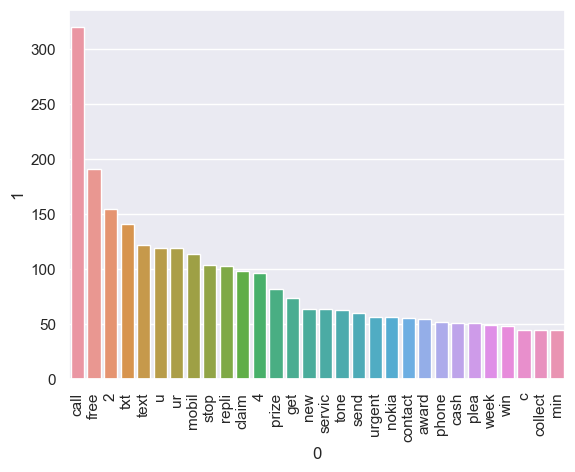

In [41]:
from collections import Counter
a1 = pd.DataFrame(Counter(ham_corpus).most_common(30))[0]
a2 = pd.DataFrame(Counter(ham_corpus).most_common(30))[1]
sns.barplot(x =a1,y=a2)
plt.xticks(rotation='vertical')
plt.show()

Model Bulding

In [42]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
tfidf = TfidfVectorizer(max_features=3000)
cv = CountVectorizer()

In [43]:
X = cv.fit_transform(df['transformed_text']).toarray()
X.shape

(5169, 6672)

In [44]:
y = df['target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= 0.2) 

In [46]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [47]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [48]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.867504835589942
[[768 124]
 [ 13 129]]
0.5098814229249012


In [49]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9806576402321083
[[878  14]
 [  6 136]]
0.9066666666666666


In [50]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9729206963249516
[[884   8]
 [ 20 122]]
0.9384615384615385


In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [52]:
svc = SVC(kernel = 'sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver= 'liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators = 50, random_state = 2)
abc = AdaBoostClassifier(n_estimators = 50, random_state = 2)
bc = BaggingClassifier(n_estimators = 50, random_state = 2)
etc = ExtraTreesClassifier(n_estimators = 50, random_state = 2)
gbdt = GradientBoostingClassifier(n_estimators = 50, random_state = 2)
xgb = XGBClassifier(n_estimators = 50, random_state = 2)

In [53]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB' : mnb,
    'DT' : dtc,
    'LR' : lrc,
    'RF' : rfc,
    'AdaBoost' : abc,
    'BgC' : bc,
    'ETC' : etc,
    'GBDT' : gbdt,
    'xgb' : xgb,
}

In [54]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [55]:
train_classifier(bc,X_train,y_train,X_test,y_test)

(0.9729206963249516, 0.9596774193548387)

In [56]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    current_accuracy, current_precision = train_classifier(clf,X_train,y_train,X_test,y_test)
    
    print("For - ",name)
    print("Accuracy -> ",current_accuracy)
    print("Precision -> ",current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For -  SVC
Accuracy ->  0.9216634429400387
Precision ->  0.7163120567375887
For -  KN
Accuracy ->  0.9110251450676983
Precision ->  1.0
For -  NB
Accuracy ->  0.9806576402321083
Precision ->  0.9066666666666666
For -  DT
Accuracy ->  0.9313346228239845
Precision ->  0.9493670886075949
For -  LR
Accuracy ->  0.9738878143133463
Precision ->  0.967479674796748
For -  RF
Accuracy ->  0.9758220502901354
Precision ->  1.0
For -  AdaBoost
Accuracy ->  0.9574468085106383
Precision ->  0.8888888888888888
For -  BgC
Accuracy ->  0.9729206963249516
Precision ->  0.9596774193548387
For -  ETC
Accuracy ->  0.9787234042553191
Precision ->  1.0
For -  GBDT
Accuracy ->  0.9506769825918762
Precision ->  0.9595959595959596
For -  xgb
Accuracy ->  0.9738878143133463
Precision ->  0.9831932773109243


In [57]:
performance_df = pd.DataFrame({
    'Algorithm' : clfs.keys(),
    'Accuracy' : accuracy_scores,
    'Precision' : precision_scores
}).sort_values("Precision", ascending=False)
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.911025,1.000000
5,RF,0.975822,1.000000
8,ETC,0.978723,1.000000
10,xgb,0.973888,0.983193
4,LR,0.973888,0.967480
7,BgC,0.972921,0.959677
9,GBDT,0.950677,0.959596
3,DT,0.931335,0.949367
2,NB,0.980658,0.906667
6,AdaBoost,0.957447,0.888889


In [58]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

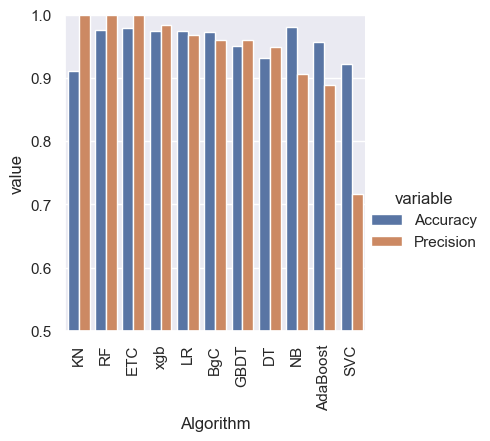

In [59]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=4)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()